In [1]:
import numpy as np
import plumed
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits import mplot3d
%matplotlib inline

rc("font", **{"family": "sans-serif", "sans-serif": ["DejaVu Sans"], "size": 10})
# Set the font used for MathJax - more on this later
rc("mathtext", **{"default": "regular"})
plt.rc("font", family="Arial")

Below we generate the figure presenting the results of the m6A and duplex systems in the main text.

<ipython-input-2-749aa47fc1da>:9: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes1D=plumed.read_as_pandas("duplex_fes1D.dat")
<ipython-input-2-749aa47fc1da>:31: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes2D = plumed.read_as_pandas("duplex_fes2D.dat")
<ipython-input-2-749aa47fc1da>:65: UserWarning: cannot load PLUMED instance, conversions will not be available
  fes_m6A=plumed.read_as_pandas("m6A_fes2D.dat")


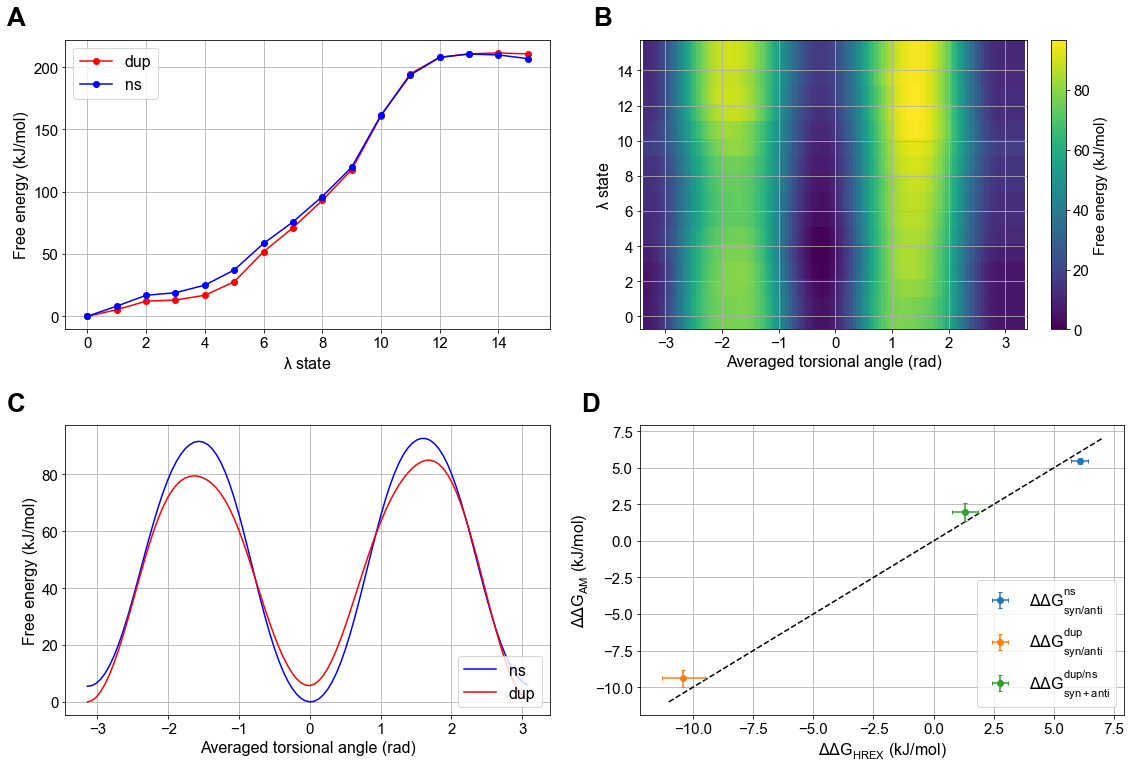

In [2]:
fig = plt.figure(figsize=(16, 12))

################################################################################
#                                                                              #
#  Panel A: Free energy profile as a function of state index for both systems  #
#                                                                              #
################################################################################
ax = fig.add_subplot(2, 2, 1)
fes1D=plumed.read_as_pandas("duplex_fes1D.dat")
duplex_fes_lambda_rew=np.load("lambda_profile_rew_duplex.npy")
m6A_fes_lambda_rew=np.load("lambda_profile_rew_m6A.npy")

plt.ylabel("Free energy (kJ/mol)", fontsize=16)
plt.xlabel(r'$\lambda$ state', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(fes1D["lambda"],(duplex_fes_lambda_rew), 'o-', color='r', label="dup")
plt.plot(fes1D["lambda"],m6A_fes_lambda_rew, 'o-', color='b', label="ns")
plt.legend(fontsize=16)
plt.grid()
plt.text(-0.12, 1.05, 'A', transform = ax.transAxes, fontsize=26, weight='bold')


########################################################
#                                                      #
#  Panel B: Shifted free energy surface of RNA duplex  #
#                                                      #
########################################################
ax = fig.add_subplot(2, 2, 2)
fes2D = plumed.read_as_pandas("duplex_fes2D.dat")
zdata = np.zeros((100,16))
for i in range(16):
    for j in range(100):
        zdata[j][i] = fes2D["file.free"][i * 100 + j]
G_lam = np.zeros(16)
for i in range(len(zdata[0])):
    G_lam[i] = np.log(np.sum(np.exp((1 / 2.494) * zdata[:,i])))

shift_free = np.zeros(len(fes2D['lambda']))
for i in range(len(fes2D['lambda'])):
    shift_free[i] = fes2D['file.free'][i] - G_lam[int(fes2D['lambda'][i])]

zdata = shift_free
xdata = fes2D["torsave"]
ydata = fes2D["lambda"]

pnt3d=ax.scatter(xdata, ydata, c=zdata - np.min(zdata), marker='s', s=860, cmap='viridis');
plt.xlabel(r'Averaged torsional angle (rad)', fontsize=16)
plt.ylabel(r'$\lambda$ state', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15)

cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label('Free energy (kJ/mol)', fontsize=15)
plt.grid()
plt.text(-0.12, 1.05, 'B', transform = ax.transAxes, fontsize=26, weight='bold')

####################################################################################################
#                                                                                                  #
#  Panel C: free energy profile as a function of the torsional angle at lambda=1 for both systems  #
#                                                                                                  #
####################################################################################################
ax = fig.add_subplot(2, 2, 3)
fes_m6A=plumed.read_as_pandas("m6A_fes2D.dat")
plt.xlabel(r'Averaged torsional angle (rad)', fontsize=16)
plt.ylabel("Free energy (kJ/mol)", fontsize=16)

plt.plot(fes_m6A["torsave"][-100:],(fes_m6A["file.free"][-100:]-np.min(fes_m6A["file.free"][-100:])),color='b', label="ns")
plt.plot(fes2D["torsave"][-100:],(fes2D["file.free"][-100:]-np.min(fes2D["file.free"][-100:])),color='red', label="dup")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=16)
plt.grid()
plt.text(-0.12, 1.05, 'C', transform = ax.transAxes, fontsize=26, weight='bold')

###################################################################################
#                                                                                 #
#  Panel D: Free energy calculations comparing HREX with alchemical metadynamics  #
#                                                                                 #
###################################################################################
ax = fig.add_subplot(2, 2, 4)
# names = [r'$nt_{anti/syn}$', r'$duplex_{anti/syn}$', 'duplex/nt',]
names = [r'$\Delta \Delta G^{ns}_{syn/anti}$', r'$\Delta \Delta G^{dup}_{syn/anti}$', '$\Delta \Delta G^{dup/ns}_{syn+anti}$',]
HREX=np.array([6.07, -10.4, 1.3])
HREX=np.array([6.07, -10.4, 1.3])
HREX_err=np.array([0.21, 0.6, 0.6])
AM=np.array([5.46,-9.4, 210.88-208.90])
AM_err=np.array([0.35, 0.9, np.sqrt(0.5 ** 2 + 0.19 ** 2)])

x = np.linspace(-11, 7,50)
plt.plot(x, x, linestyle='dashed', color='k')
for i in range(3):
    plt.errorbar(HREX[i], AM[i], HREX_err[i], AM_err[i], fmt='o', capsize=2, label=names[i])
plt.ylabel(r'$\Delta \Delta G_{AM}$ (kJ/mol)', fontsize=16)
plt.xlabel(r'$\Delta \Delta G_{HREX}$ (kJ/mol)', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=16)
plt.grid()
plt.text(-0.12, 1.05, 'D', transform = ax.transAxes, fontsize=26, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2.0)
plt.savefig('m6A_results.jpg', dpi=600)

And here are some figures included in the SI:

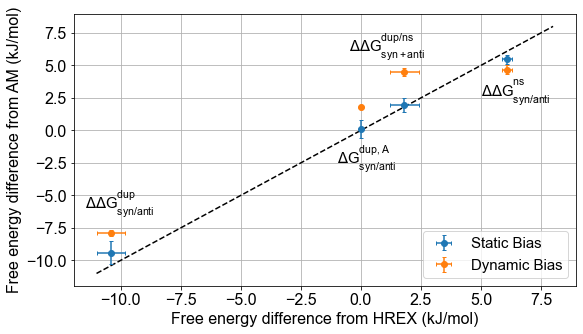

In [3]:
HREX=[6.07, -10.4, 1.8, 0]
HREX_err=[0.21, 0.6, 0.6, 0]

#statica bias
AM=[5.46, -9.4, 210.88-208.90, 0.1]
AM_err=[0.35, 0.9, np.sqrt(0.5 ** 2 + 0.19 ** 2),0.7]

#dynamic bias, htm avg on last 100ns
AMb=[4.66, -7.9, 215.98-211.5, 1.81]
AMb_err=[0.35, 0.22, np.sqrt(0.25 ** 2 + 0.15 ** 2),0.16]

plt.figure(figsize=(9, 5))
x=np.linspace(-11, 8, 50)
plt.ylabel(r'Free energy difference from AM (kJ/mol)', fontsize=16)
plt.xlabel(r'Free energy difference from HREX (kJ/mol)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
names = [r'$\Delta \Delta G^{ns}_{syn/anti}$', r'$\Delta \Delta G^{dup}_{syn/anti}$', '$\Delta \Delta G^{dup/ns}_{syn+anti}$', r'$\Delta G^{dup, A}_{syn/anti}$']
# names = [r'n6$_{anti/syn}$', r'duplex$_{anti/syn}$', 'duplex/nt', r'A_dup$_{anti/syn}$' ]

plt.plot(x, x, linestyle='dashed', color='k')

plt.errorbar(HREX, AM, AM_err, HREX_err, fmt='o', capsize=2, label='Static Bias')
plt.errorbar(HREX, AMb, AMb_err, HREX_err, fmt='o', capsize=2, label='Dynamic Bias')

plt.text(5, 2.6, names[0], fontsize=15)
plt.text(-11.5, -6, names[1], fontsize=15)
plt.text(-0.5, 6, names[2], fontsize=15)
plt.text(-1.0, -2.6, names[3], fontsize=15)

plt.legend(loc='lower right', fontsize=15)
plt.grid()

plt.savefig('m6A_dynamic_static.jpg', dpi=600)

<ipython-input-4-2a9de33dc258>:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas("./COLVAR_wrongCV")
<ipython-input-4-2a9de33dc258>:16: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvarB = plumed.read_as_pandas("./COLVAR_goodCV")


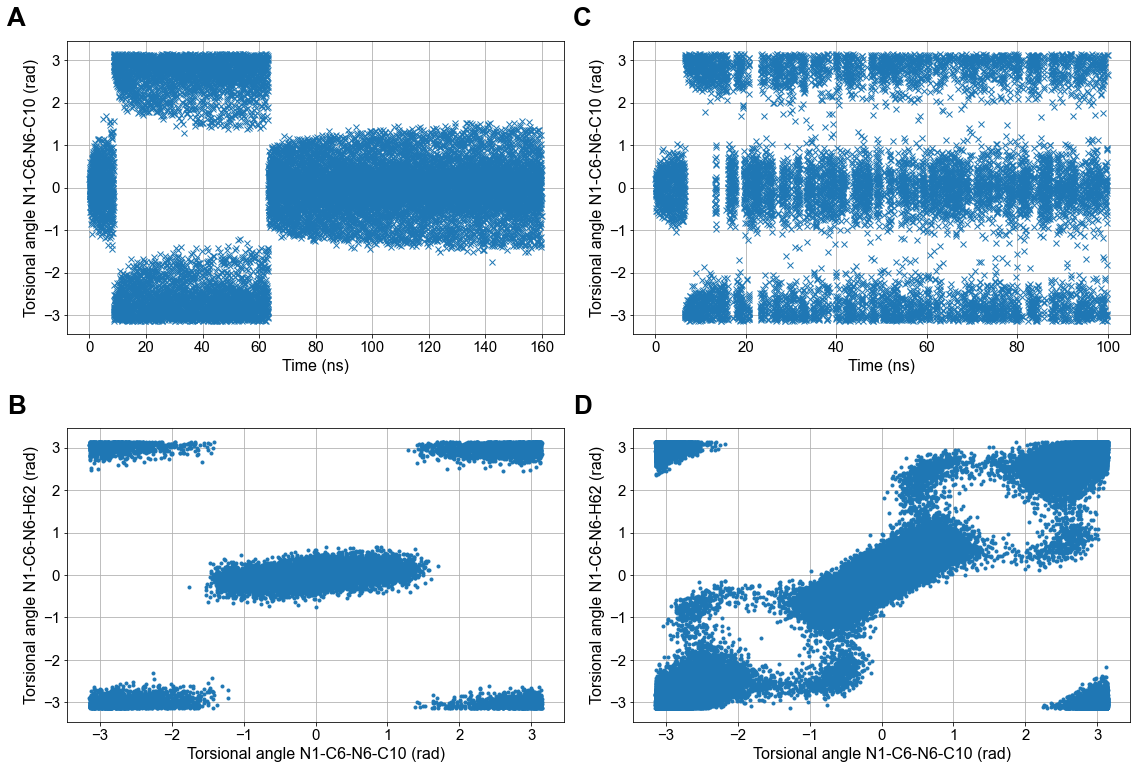

In [4]:
fig = plt.figure(figsize=(16, 12))

# Panel A
ax = fig.add_subplot(2, 2, 1)
colvar = plumed.read_as_pandas("./COLVAR_wrongCV")
plt.plot(colvar["time"][::10] / 1000, colvar["eta6"][::10], "x")
plt.xlabel("Time (ns)", fontsize=16)
plt.ylabel('Torsional angle N1-C6-N6-C10 (rad)', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.text(-0.12, 1.05, 'A', transform = ax.transAxes, fontsize=26, weight='bold')

# Panel B
ax = fig.add_subplot(2, 2, 2)
colvarB = plumed.read_as_pandas("./COLVAR_goodCV")
plt.plot(colvarB["time"][::10] / 1000, colvarB["eta6"][::10], "x")
plt.xlabel("Time (ns)", fontsize=16)
plt.ylabel('Torsional angle N1-C6-N6-C10 (rad)', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.text(-0.12, 1.05, 'C', transform = ax.transAxes, fontsize=26, weight='bold')

# Panel C
ax = fig.add_subplot(2, 2, 3)
plt.plot(colvar["eta6"][::10],colvar["N1H62"][::10],".")
plt.xlabel("Torsional angle N1-C6-N6-C10 (rad)", fontsize=16)
plt.ylabel("Torsional angle N1-C6-N6-H62 (rad)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.text(-0.12, 1.05, 'B', transform = ax.transAxes, fontsize=26, weight='bold')

# Panel D 
ax = fig.add_subplot(2, 2, 4)
plt.plot(colvarB["eta6"],colvarB["N1H62"],".")
plt.xlabel("Torsional angle N1-C6-N6-C10 (rad)", fontsize=16)
plt.ylabel("Torsional angle N1-C6-N6-H62 (rad)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.text(-0.12, 1.05, 'D', transform = ax.transAxes, fontsize=26, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2.0)
plt.savefig('m6A_sampling.jpg', dpi=600)